In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/err-csv/error_data_csv.csv


In [2]:
#importing all the necessary libraries

!pip install sentence-transformers
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sentence_transformers
from sentence_transformers import SentenceTransformer
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e769631456d36218dcb65e38d43d313dc232a8cb64dfd476d946921bfa60ef79
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence-transformers


In [3]:
#importing the dataset
#displaying the details of the imported dataset
data_df = pd.read_csv(r'/kaggle/input/err-csv/error_data_csv.csv')
print(data_df.info())
print('******************************')
print('Shape of the data : ')
print(data_df.shape)
print('******************************')
print(data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sl. No             71 non-null     int64 
 1   Error Description  71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None
******************************
Shape of the data : 
(71, 2)
******************************
   Sl. No                                  Error Description
0       1  ERROR VCP2571 "Instantiations must have bracke...
1       2  ERROR VCP2571 "Instantiations must have bracke...
2       3  ERROR VCP2571 "Instantiations must have bracke...
3       4  ERROR VCP2571 "Instantiations must have bracke...
4       5  ERROR VCP2571 "Instantiations must have bracke...


In [4]:
#preprocessing the raw data
#transforming into clean data
reduced_data = []
for i in range(0,data_df.shape[0]):
    line = data_df['Error Description'].iloc[i]
    line = line.lower()
    line = re.sub(r'\d+', '', line)
    translator = str.maketrans('', '', string.punctuation)
    line = line.translate(translator)
    line = " ".join(line.split())
    reduced_data.append(line)
    print(line)

error vcp instantiations must have brackets hresp testbenchsv
error vcp instantiations must have brackets hrdata testbenchsv
error vcp instantiations must have brackets hready testbenchsv
error vcp instantiations must have brackets prdata testbenchsv
error vcp instantiations must have brackets psel testbenchsv
error vcp instantiations must have brackets penable testbenchsv
error vcp instantiations must have brackets paddr testbenchsv
error vcp instantiations must have brackets pwrite testbenchsv
error vcp syntax error unexpected token testbenchsv
error vcp modulemacromoduleendmodule pairs mismatch detected endmodule tokens are missing testbenchsv
error vcp syntax error unexpected token designsv
error vcp modulemacromoduleendmodule pairs mismatch detected endmodule tokens are missing testbenchsv
error vcp syntax error unexpected token endend testbenchsv
error vcp syntax error unexpected token bidentifier testbenchsv
error vcp syntax error unexpected token voidvoid
error vcp string const

In [5]:
#adding the column of clean data in the actual dataframe beside raw data
data_df["Clean data"] = reduced_data
#converting the clean data lines to numerical vectors
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')
reduced_data_embeddings = embedder.encode(reduced_data)
#displaying the original dataframe with the added clean data column
print(data_df.head())
print('***************************************************')
#displaying the numerical feature vectors
print('Numerical feature arrays :')
print(reduced_data_embeddings)
print('shape of the numerical feature array :')
print(reduced_data_embeddings.shape)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

   Sl. No                                  Error Description  \
0       1  ERROR VCP2571 "Instantiations must have bracke...   
1       2  ERROR VCP2571 "Instantiations must have bracke...   
2       3  ERROR VCP2571 "Instantiations must have bracke...   
3       4  ERROR VCP2571 "Instantiations must have bracke...   
4       5  ERROR VCP2571 "Instantiations must have bracke...   

                                          Clean data  
0  error vcp instantiations must have brackets hr...  
1  error vcp instantiations must have brackets hr...  
2  error vcp instantiations must have brackets hr...  
3  error vcp instantiations must have brackets pr...  
4  error vcp instantiations must have brackets ps...  
***************************************************
Numerical feature arrays :
[[-0.6407397   0.06565557  0.33610117 ... -0.6179526   0.2909134
   0.07429865]
 [-0.6048836   0.10567376  0.37357318 ... -0.4875803   0.27248925
   0.24101843]
 [-0.62116086  0.11403541  0.19604348 ... -0.

Text(0, 0.5, 'inertia')

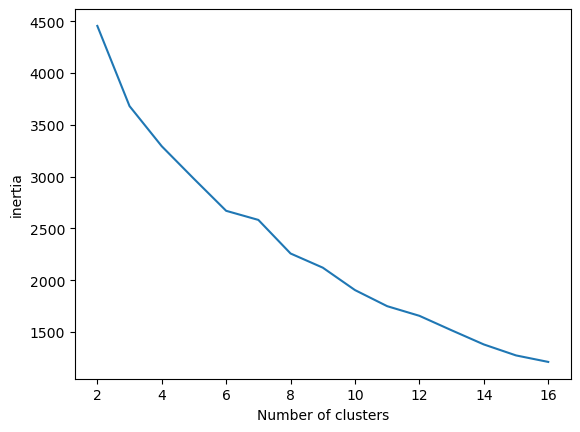

In [6]:
#finding the ideal number of clusters using Elbow method
scores=[]
for i in range(15):
    scores.append(KMeans(n_clusters=i+2).fit(reduced_data_embeddings).inertia_) 
x=np.arange(2,17)
plt.plot(x,scores)
plt.xlabel('Number of clusters')
plt.ylabel('inertia')

In [7]:
#from the Graph, the optimal number of clusters can be taken as 6 from the elbow method
#applying the clustering algorithm
num_of_clusters = 6
cl_model = KMeans(n_clusters=num_of_clusters)
cl_model.fit(reduced_data_embeddings)
labels = cl_model.labels_
#adding the cluster column to the original dataframe
data_df['cluster']=cl_model.labels_
print(data_df.head())

   Sl. No                                  Error Description  \
0       1  ERROR VCP2571 "Instantiations must have bracke...   
1       2  ERROR VCP2571 "Instantiations must have bracke...   
2       3  ERROR VCP2571 "Instantiations must have bracke...   
3       4  ERROR VCP2571 "Instantiations must have bracke...   
4       5  ERROR VCP2571 "Instantiations must have bracke...   

                                          Clean data  cluster  
0  error vcp instantiations must have brackets hr...        3  
1  error vcp instantiations must have brackets hr...        3  
2  error vcp instantiations must have brackets hr...        3  
3  error vcp instantiations must have brackets pr...        3  
4  error vcp instantiations must have brackets ps...        3  


In [8]:
#sorting the dataset by cluster values
#displaying the content of separate clusters
rslt_df = data_df.sort_values(by = 'cluster')
clus = 0
count = 0
cluster_length = []
print('Contents of cluster '+str(clus))

for i in range(0,rslt_df.shape[0]):
    if rslt_df['cluster'].iloc[i]==clus :
        print(rslt_df['Error Description'].iloc[i])
        count = count + 1
    else :
        clus = clus + 1
        print('**************************************************************')
        print('Contents of cluster '+str(clus))
        cluster_length.append(count)
        count=1
cluster_length.append(count)

Contents of cluster 0
# VSIM: Error: Simulation initialization failed.
# VSIM: Error: Simulation initialization failed.
KERNEL: Error: E8005 : Kernel process initialization failed.
WARNING VCP2803 "Function n1.cool result is ignored."
ERROR VCP2617 "Expression time has no value."
**************************************************************
Contents of cluster 1
ELAB2: Fatal Error: ELAB2_0036 Unresolved hierarchical reference
ELAB2: Fatal Error: ELAB2_0036 Unresolved hierarchical reference to "monitor./4/" from module "prientb"
ERROR VCP2020 "begin...end pair(s) mismatch detected.
# ELBREAD: Error: Elaboration process completed with errors.
Error: Fatal error occurred during simulation.
ERROR VCP2020 "begin...end pair(s) mismatch detected.
**************************************************************
Contents of cluster 2
ERROR VCP2000 "Syntax error. Unexpected token: ;." "testbench.sv" 2  10
ERROR VCP2000 "Syntax error. Unexpected token
ERROR VCP2000 "Syntax error. Unexpected token:

In [9]:
#printing the details of the error clusters
print('Details about the error clusters :')
print('*******************************************************')
for i in range(0,num_of_clusters):
    print('Number of errors in cluster '+str(i)+' : '+str(cluster_length[i]))
    print('-----------------------------------------------------')

Details about the error clusters :
*******************************************************
Number of errors in cluster 0 : 5
-----------------------------------------------------
Number of errors in cluster 1 : 7
-----------------------------------------------------
Number of errors in cluster 2 : 20
-----------------------------------------------------
Number of errors in cluster 3 : 14
-----------------------------------------------------
Number of errors in cluster 4 : 8
-----------------------------------------------------
Number of errors in cluster 5 : 17
-----------------------------------------------------


In [10]:
cluster0_df = rslt_df[rslt_df.cluster==0]
cluster0_df

,Sl. No,Error Description,Clean data,cluster
21,22,# VSIM: Error: Simulation initialization failed.,vsim error simulation initialization failed,0
34,35,# VSIM: Error: Simulation initialization failed.,vsim error simulation initialization failed,0
33,34,KERNEL: Error: E8005 : Kernel process initiali...,kernel error e kernel process initialization f...,0
53,54,"WARNING VCP2803 ""Function n1.cool result is ig...",warning vcp function ncool result is ignored,0
39,40,"ERROR VCP2617 ""Expression time has no value.""",error vcp expression time has no value,0


In [11]:
from flask import Flask

app = Flask(__name__)


In [12]:
!pip install multi-rake

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 26.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9918562 sha256=54d673d82a231b1a10202e9ec110349eaaa4c0eccc27feeee21e64ed4bfaea58
  Stored in directory: /root/.cache/pip/wheels/c1/de/c1/1fbc29052dd2d6a5ae89df9d12ccbb16bc1a2d309b6e95cff5
Successfully built pycld2


In [13]:
from multi_rake import Rake
text_en = (
    'Compatibility of systems of linear constraints over the set of '
    'natural numbers. Criteria of compatibility of a system of linear '
    'Diophantine equations, strict inequations, and nonstrict inequations '
    'are considered. Upper bounds for components of a minimal set of '
    'solutions and algorithms of construction of minimal generating sets '
    'of solutions for all types of systems are given. These criteria and '
    'the corresponding algorithms for constructing a minimal supporting '
    'set of solutions can be used in solving all the considered types of '
    'systems and systems of mixed types.'
)

rake = Rake()

keywords = rake.apply(text_en)

print(keywords[:10])

#  ('minimal generating sets', 8.666666666666666),
#  ('linear diophantine equations', 8.5),
#  ('minimal supporting set', 7.666666666666666),
#  ('minimal set', 4.666666666666666),
#  ('linear constraints', 4.5),
#  ('natural numbers', 4.0),
#  ('strict inequations', 4.0),
#  ('nonstrict inequations', 4.0),
#  ('upper bounds', 4.0),
#  ('mixed types', 3.666666666666667)

[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667)]


In [14]:
#cluster0_df['Clean data'].iloc[0]
cluster0_String = ""
for i in range(0,cluster0_df.shape[0]):
    cluster0_String = cluster0_String + str(cluster0_df['Clean data'].iloc[i]) + str(" ")
cluster0_String

'vsim error simulation initialization failed vsim error simulation initialization failed kernel error e kernel process initialization failed warning vcp function ncool result is ignored error vcp expression time has no value '

In [15]:
#keywords = rake.apply(cluster0_String)
rake.extract_keywords_from_text(cluster0_String)
print(r.get_ranked_phrases())

AttributeError: 'Rake' object has no attribute 'extract_keywords_from_text'

In [ ]:
type(text_en)
type(cluster0_String)

In [ ]:
text_en

In [ ]:
!pip install rake_nltk
from rake_nltk import Rake
r = Rake()

In [ ]:
r = Rake()
r.extract_keywords_from_text(cluster0_String)
r.get_ranked_phrases()

In [ ]:
r.get_ranked_phrases_with_scores()

In [ ]:
cluster0_String

In [16]:
from nltk import tokenize
from operator import itemgetter
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))



In [18]:
total_words = word_tokenize(cluster0_String)
total_words

['vsim',
 'error',
 'simulation',
 'initialization',
 'failed',
 'vsim',
 'error',
 'simulation',
 'initialization',
 'failed',
 'kernel',
 'error',
 'e',
 'kernel',
 'process',
 'initialization',
 'failed',
 'warning',
 'vcp',
 'function',
 'ncool',
 'result',
 'is',
 'ignored',
 'error',
 'vcp',
 'expression',
 'time',
 'has',
 'no',
 'value']

In [19]:
tf_score = {}
total_word_length = len(total_words)
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word]+=1
        else:
            tf_score[each_word] = 1

tf_score.update((x,y/int(total_word_length)) for x, y in tf_score.items())
print(tf_score)

{'vsim': 0.06451612903225806, 'error': 0.12903225806451613, 'simulation': 0.06451612903225806, 'initialization': 0.0967741935483871, 'failed': 0.0967741935483871, 'kernel': 0.06451612903225806, 'e': 0.03225806451612903, 'process': 0.03225806451612903, 'warning': 0.03225806451612903, 'vcp': 0.06451612903225806, 'function': 0.03225806451612903, 'ncool': 0.03225806451612903, 'result': 0.03225806451612903, 'ignored': 0.03225806451612903, 'expression': 0.03225806451612903, 'time': 0.03225806451612903, 'value': 0.03225806451612903}


In [ ]:
cluster2_df = rslt_df[rslt_df.cluster==2]
cluster2_String = ""
for i in range(0,cluster2_df.shape[0]):
    cluster2_String = cluster2_String + str(cluster2_df['Clean data'].iloc[i]) + str(" ")

total_words = word_tokenize(cluster2_String)
tf_score = {}
total_word_length = len(total_words)
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word]+=1
        else:
            tf_score[each_word] = 1

tf_score.update((x,y/int(total_word_length)) for x, y in tf_score.items())

sorted(tf_score.items(), key=lambda item: item[1], reverse=True)

In [ ]:
type(tf_score)
sorted(tf_score.items())